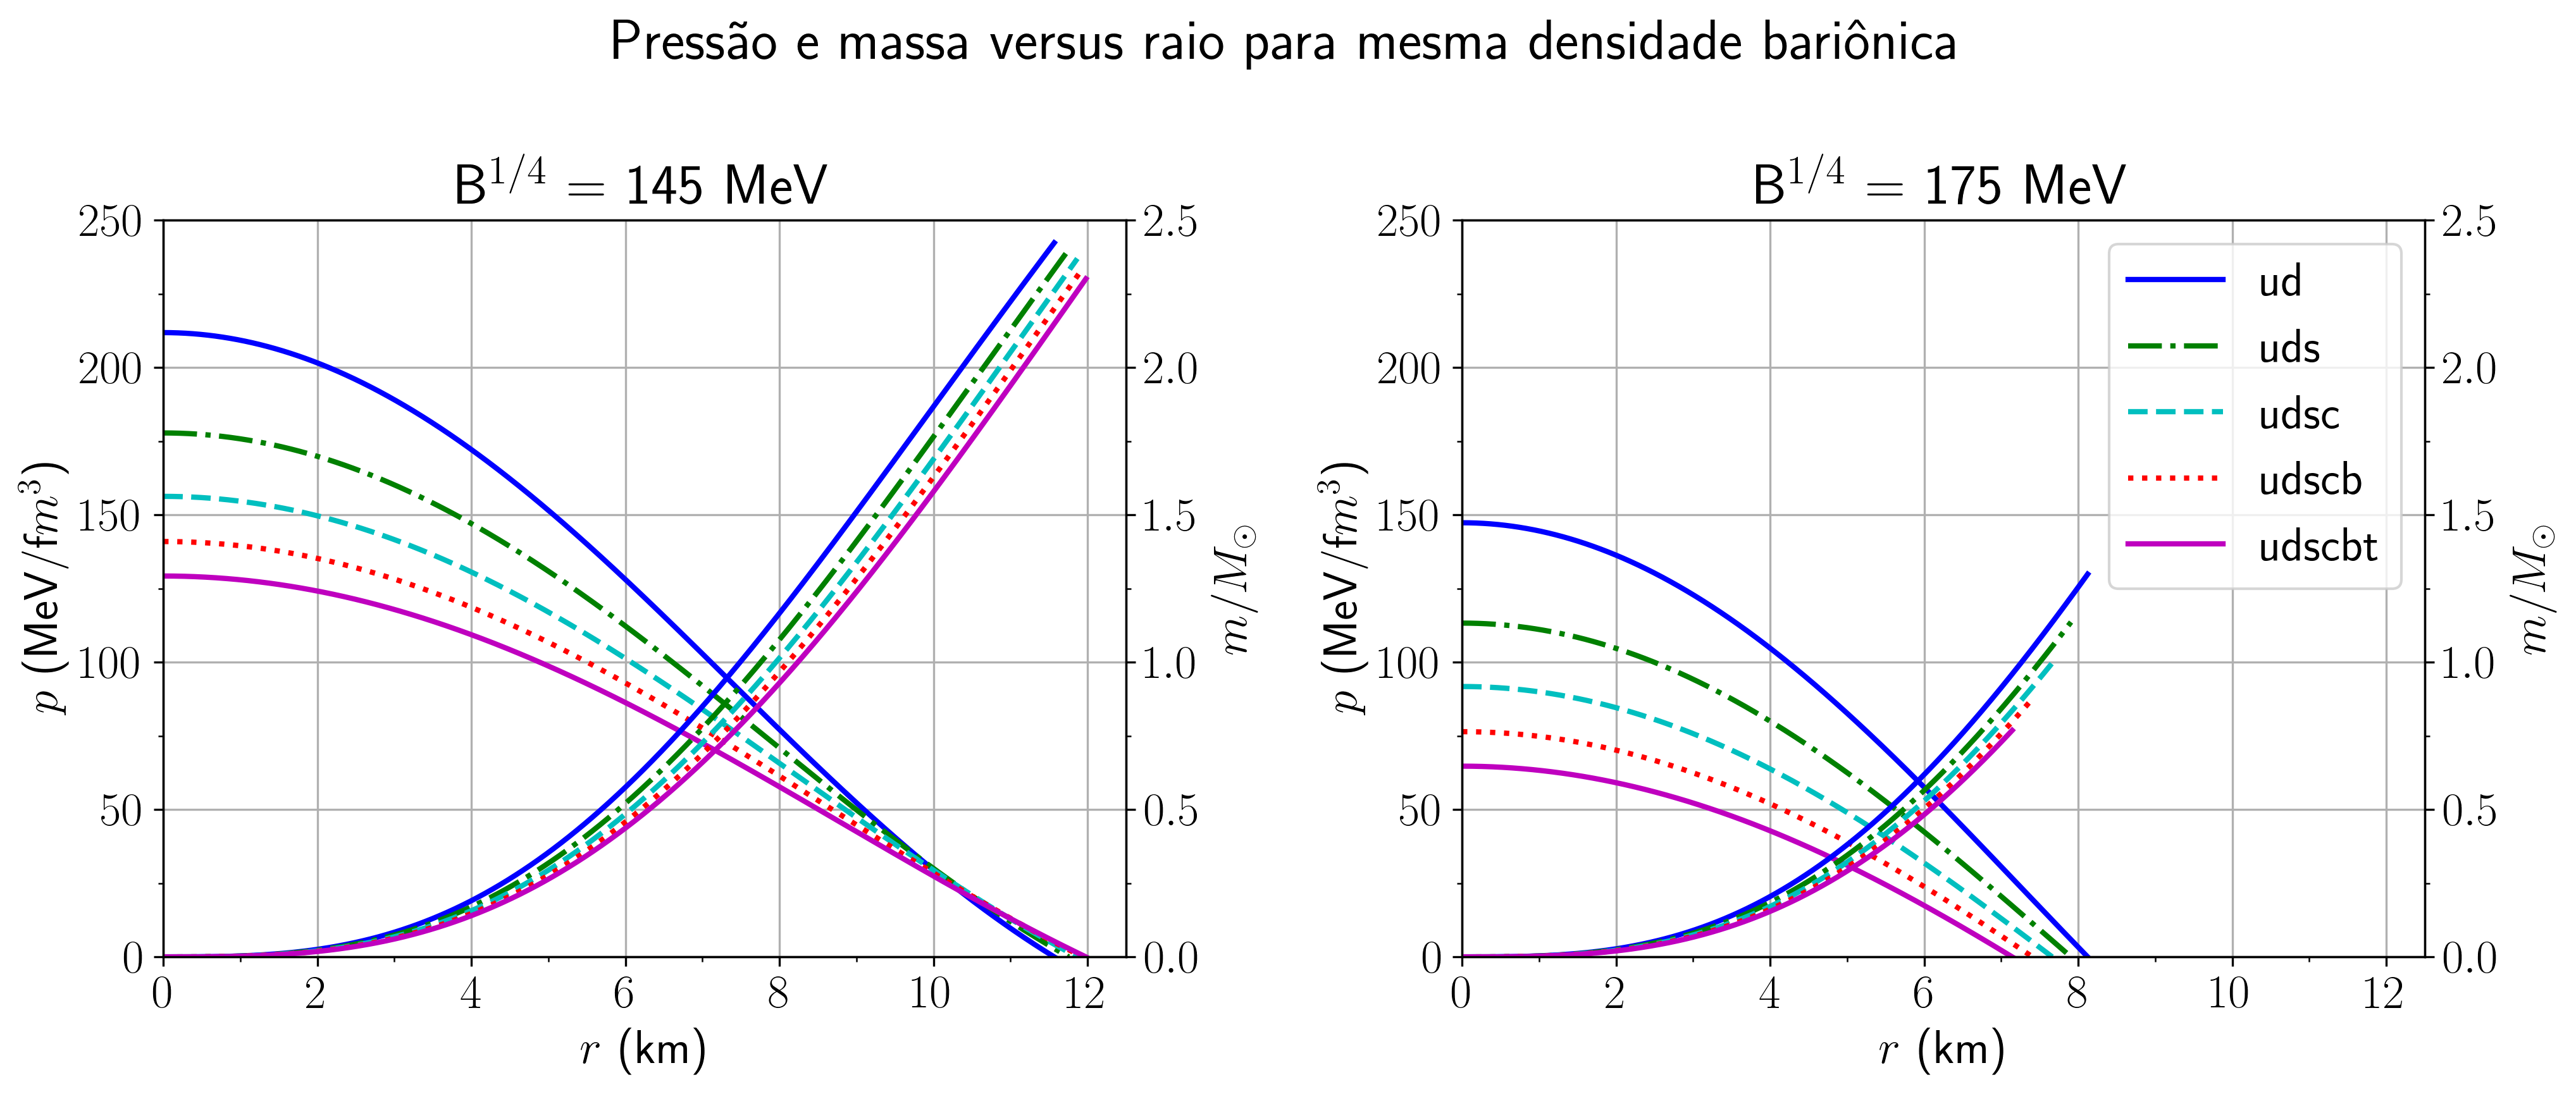

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

plt.rcParams['text.usetex'] = True
plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams['figure.dpi'] = 300

fig, ax1 = plt.subplots(1,2)
#-------------------------------------------------------
bagPressures = []
bagPressures.append(145)
#bagPressures.append(155)
#bagPressures.append(165)
bagPressures.append(175)
titles = []
titles.append('ud')
titles.append('uds')
titles.append('udsc')
titles.append('udscb')
titles.append('udscbt')
dirs = []
for bP in bagPressures:
    for i in titles:
        dirs.append('../cpp/output/' + i + 'B' + str(bP) +'.dat')
#print(dirs)
cols = []
cols.append('b')
cols.append('g-.')
cols.append('c--')
cols.append('r:')
cols.append('m')

for k in range(2):
    x = []
    ax1[k].set_title("B$^{1/4}$ = "+ str(bagPressures[k]) +" MeV")
    ax1[k].set_xlabel(r'$r$ (km)')
    ax1[k].set_ylabel(r'$p$ (MeV/f$m^3$)')
    ax1[k].set_xlim([0,12.5])
    ax1[k].xaxis.set_major_locator(MultipleLocator(2))
    ax1[k].xaxis.set_minor_locator(MultipleLocator(1))
    ax1[k].yaxis.set_major_locator(MultipleLocator(50))
    ax1[k].yaxis.set_minor_locator(MultipleLocator(25))
    ax1[k].set_ylim([0,250])
    ax2 = ax1[k].twinx()
    ax2.set_ylabel(r'$m/M_\odot$')
    ax2.set_ylim([0,2.5])
    ax2.yaxis.set_major_locator(MultipleLocator(0.5))
    ax2.yaxis.set_minor_locator(MultipleLocator(0.25))
        
    for i in range(5):
        x.append([])
        with open(dirs[i+k*5], 'r') as f:   
            #print(dirs[i+k*5+j*10])
            lines = f.readlines()
            x[i].append([float(line.split()[0]) for line in lines])
            x[i].append([float(line.split()[1]) for line in lines])
            x[i].append([float(line.split()[2]) for line in lines])

        ax1[k].grid()
        ax1[k].plot(x[i][0],x[i][1], cols[i], label=titles[i],linewidth=2)
        ax2.plot(x[i][0],x[i][2], cols[i],linewidth=2)

fig.suptitle("Pressão e massa versus raio para mesma densidade bariônica")
fig.tight_layout(pad=1.25)
ax1[1].legend(loc='upper right')
plt.show()